In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind

df = pd.read_csv('/content/economic, social, country.csv')

In [ ]:
print(df.columns)



Index(['country_code', 'year', 'LifeExpectancy_Female', 'LifeExpectancy_Male',
       'LifeExpectancy_Total', 'LiteracyRate_AdultTotal',
       'LiteracyRate_YouthTotal', 'Multidim_PovertyHeadcountRatio_UNDP',
       'Multidim_PovertyHeadcountRatio_WorldBank',
       'Water_BasicDrinkingServices_PercentofPop',
       'Water_SafelyManagedDrinkingServices_PercentofPop',
       'Water_BasicHandwashing_PercentofPop',
       'Poverty_HeadcountRatio_NationalPovertyLines_Percent',
       'Poverty_HeadcountRatio_SocietalPovertyLines_Percent',
       'Unemployment_AdvancedEducation_Percent',
       'Unemployment_BasicEducation_Percent',
       'Unemployment_IntermediateEducation_Percent',
       'Unemployment_Total_Percent', 'Unemployment_YouthTotal_Percent',
       'MortalityRate_Air', 'MortalityRate_Poisoning',
       'MortalityRate_WaterHygiene', 'country_code.1', 'year.1',
       'FDI_Net_CurrentUD', 'FDI_NetInflows_PercentGDP',
       'FDI_NetInflows_CurrentUD', 'FDI_NetOutflows_PercentGDP

# **How has access to electricity and clean drinking water changed over the years, and how do these trends correlate with poverty?**

In [ ]:
environmental_df = pd.read_csv('/content/environmental.csv')
environmental_df.head()


,country_code,year,ElectricityAccess_PercentofPopulation,CO2Emissions_Agriculture,CO2Emissions_TransportEnergy,CO2Emissions_Waste,ForestArea_PercentofLand,RenewableEnergy_Consumption_Percent,GreenhouseGasEmissions_TotalperCapita
0,AUS,2019,100.0,2.2902,97.0408,0.0156,17.421315,10.3,3.680158
1,AUS,2020,100.0,2.6643,90.5044,0.0158,17.421315,11.2,3.680158
2,AUS,2021,100.0,3.2157,87.6070,0.0157,17.421315,12.3,3.680158
3,AUS,2022,100.0,3.3159,89.2178,0.0158,17.421315,NaN,3.680158
4,AUS,2023,NaN,3.4267,95.6792,0.0158,NaN,NaN,3.680158


In [ ]:
missing = yearly_trends[
    ['ElectricityAccess_PercentofPopulation',
     'Water_BasicDrinkingServices_PercentofPop',
     'Multidim_PovertyHeadcountRatio_WorldBank']
].isna().sum()

percent_missing = missing / len(yearly_trends) * 100
print(percent_missing)


ElectricityAccess_PercentofPopulation       20.0
Water_BasicDrinkingServices_PercentofPop    20.0
Multidim_PovertyHeadcountRatio_WorldBank     0.0
dtype: float64


In [ ]:
# Interpolate missing values
interpolated_trends = yearly_trends.copy()
interpolated_trends[['ElectricityAccess_PercentofPopulation',
                     'Water_BasicDrinkingServices_PercentofPop']] = interpolated_trends[
    ['ElectricityAccess_PercentofPopulation',
     'Water_BasicDrinkingServices_PercentofPop']
].interpolate(method='linear')

print(interpolated_trends.isna().sum())


year                                        0
ElectricityAccess_PercentofPopulation       0
Water_BasicDrinkingServices_PercentofPop    0
Multidim_PovertyHeadcountRatio_WorldBank    0
dtype: int64


In [ ]:
merged_df = pd.merge(
    df,
    environmental_df[['country_code', 'year', 'ElectricityAccess_PercentofPopulation']],
    on=['country_code', 'year'],
    how='left'
)


In [ ]:
yearly_trends = merged_df.groupby('year')[
    ['ElectricityAccess_PercentofPopulation',
     'Water_BasicDrinkingServices_PercentofPop',
     'Multidim_PovertyHeadcountRatio_WorldBank']
].mean().reset_index()


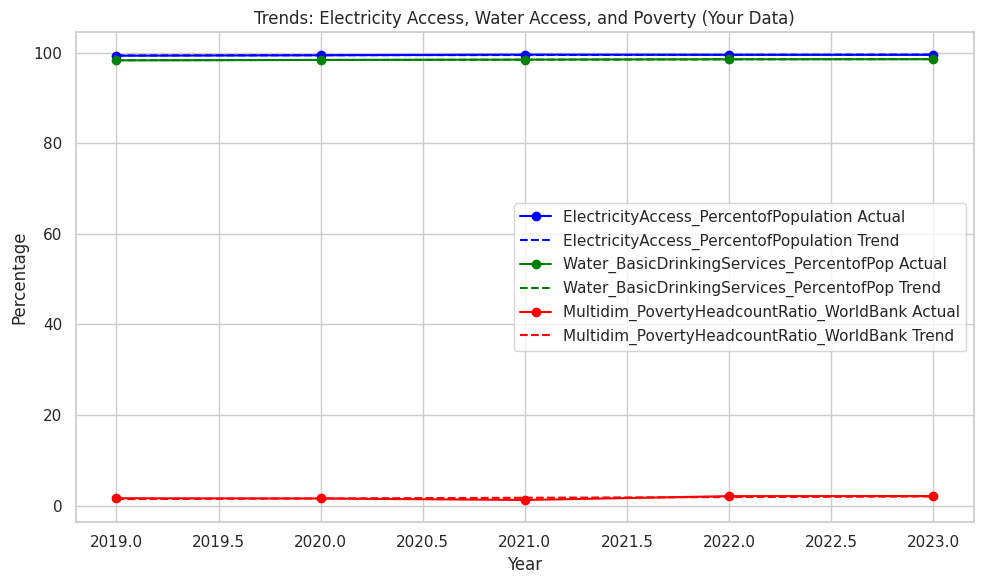

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X_year = interpolated_trends[['year']]
models = {}
predicted_trends = {}

for column in ['ElectricityAccess_PercentofPopulation',
               'Water_BasicDrinkingServices_PercentofPop',
               'Multidim_PovertyHeadcountRatio_WorldBank']:
    model = LinearRegression()
    model.fit(X_year, interpolated_trends[[column]])
    models[column] = model
    predicted_trends[column] = model.predict(X_year)

plt.figure(figsize=(10, 6))

for column, color in zip(['ElectricityAccess_PercentofPopulation',
                          'Water_BasicDrinkingServices_PercentofPop',
                          'Multidim_PovertyHeadcountRatio_WorldBank'],
                         ['blue', 'green', 'red']):
    plt.plot(interpolated_trends['year'], interpolated_trends[column], 'o-', label=f"{column} Actual", color=color)
    plt.plot(interpolated_trends['year'], predicted_trends[column], '--', label=f"{column} Trend", color=color)

plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Trends: Electricity Access, Water Access, and Poverty (Your Data)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


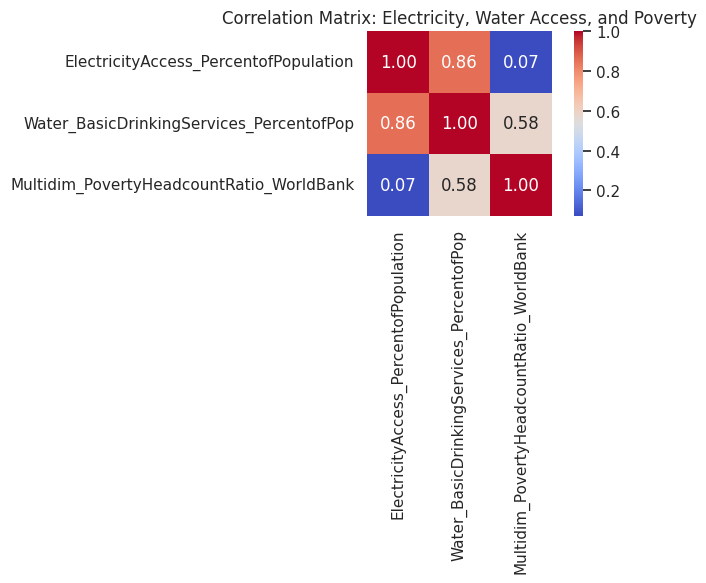

In [ ]:
import seaborn as sns

correlation_columns = [
    'ElectricityAccess_PercentofPopulation',
    'Water_BasicDrinkingServices_PercentofPop',
    'Multidim_PovertyHeadcountRatio_WorldBank'
]

# Compute the correlation matrix
correlation_matrix = interpolated_trends[correlation_columns].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Matrix: Electricity, Water Access, and Poverty")
plt.tight_layout()
plt.show()


Electricity ↔ Water access: Strong positive correlation (0.86)

Water access ↔ Poverty: Moderate negative correlation (0.58) — as water access improves, poverty tends to decrease.

Electricity ↔ Poverty: Very weak correlation (0.07) —  electricity access is already nearly universal, so it doesn’t explain current poverty variation much.

In [ ]:
country_codes = merged_df['country_code'].unique()
print("Number of unique countries:", len(country_codes))
print("Country codes:")
print(sorted(country_codes))

Number of unique countries: 40
Country codes:
['AUS', 'AUT', 'BEL', 'BRA', 'CAN', 'CHE', 'CHN', 'CZE', 'DEU', 'DNK', 'EGY', 'ESP', 'FIN', 'FRA', 'GBR', 'GRC', 'HKG', 'IDN', 'IND', 'IRN', 'IRQ', 'ISR', 'ITA', 'JPN', 'KOR', 'MEX', 'MYS', 'NLD', 'NOR', 'PAK', 'POL', 'PRT', 'RUS', 'SAU', 'SGP', 'SWE', 'THA', 'TUR', 'USA', 'ZAF']


In [ ]:
# Region mapping - 40 countries
country_region_map = {
    'AUS': 'Oceania',
    'AUT': 'Europe',
    'BEL': 'Europe',
    'BRA': 'Latin America',
    'CAN': 'North America',
    'CHE': 'Europe',
    'CHN': 'East Asia',
    'CZE': 'Europe',
    'DEU': 'Europe',
    'DNK': 'Europe',
    'EGY': 'Africa',
    'ESP': 'Europe',
    'FIN': 'Europe',
    'FRA': 'Europe',
    'GBR': 'Europe',
    'GRC': 'Europe',
    'HKG': 'East Asia',
    'IDN': 'Southeast Asia',
    'IND': 'South Asia',
    'IRN': 'Middle East',
    'IRQ': 'Middle East',
    'ISR': 'Middle East',
    'ITA': 'Europe',
    'JPN': 'East Asia',
    'KOR': 'East Asia',
    'MEX': 'Latin America',
    'MYS': 'Southeast Asia',
    'NLD': 'Europe',
    'NOR': 'Europe',
    'PAK': 'South Asia',
    'POL': 'Europe',
    'PRT': 'Europe',
    'RUS': 'Europe/Central Asia',
    'SAU': 'Middle East',
    'SGP': 'Southeast Asia',
    'SWE': 'Europe',
    'THA': 'Southeast Asia',
    'TUR': 'Middle East',
    'USA': 'North America',
    'ZAF': 'Africa'
}

merged_df['region'] = merged_df['country_code'].map(country_region_map)

print(merged_df['region'].value_counts(dropna=False))


region
Europe                 425
Middle East            125
Southeast Asia         100
East Asia              100
Africa                  50
Latin America           50
South Asia              50
North America           50
Oceania                 25
Europe/Central Asia     25
Name: count, dtype: int64


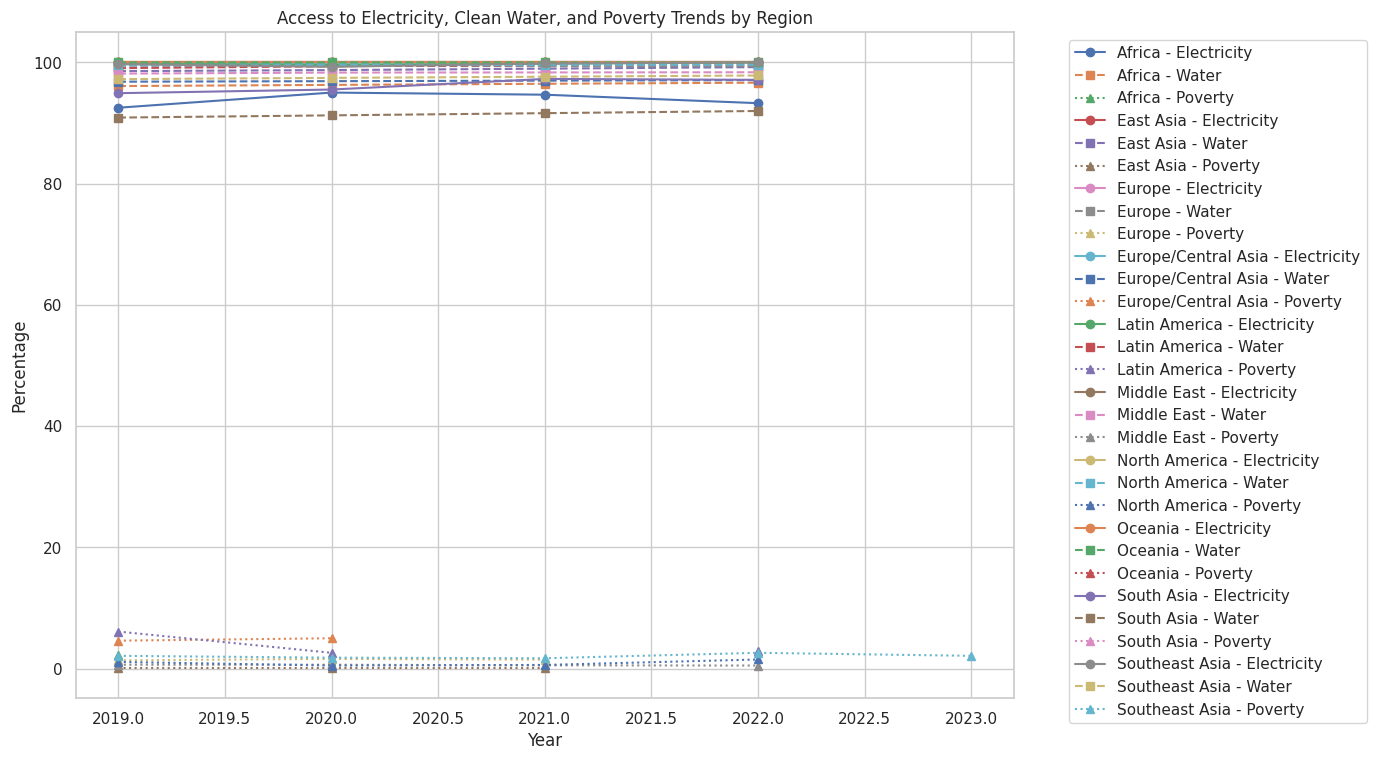

In [ ]:
plt.figure(figsize=(14, 8))

for region in regional_trends['region'].unique():
    region_data = regional_trends[regional_trends['region'] == region]

    plt.plot(region_data['year'], region_data['ElectricityAccess_PercentofPopulation'],
             label=f'{region} - Electricity', linestyle='-', marker='o')
    plt.plot(region_data['year'], region_data['Water_BasicDrinkingServices_PercentofPop'],
             label=f'{region} - Water', linestyle='--', marker='s')
    plt.plot(region_data['year'], region_data['Multidim_PovertyHeadcountRatio_WorldBank'],
             label=f'{region} - Poverty', linestyle=':', marker='^')

plt.title("Access to Electricity, Clean Water, and Poverty Trends by Region")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

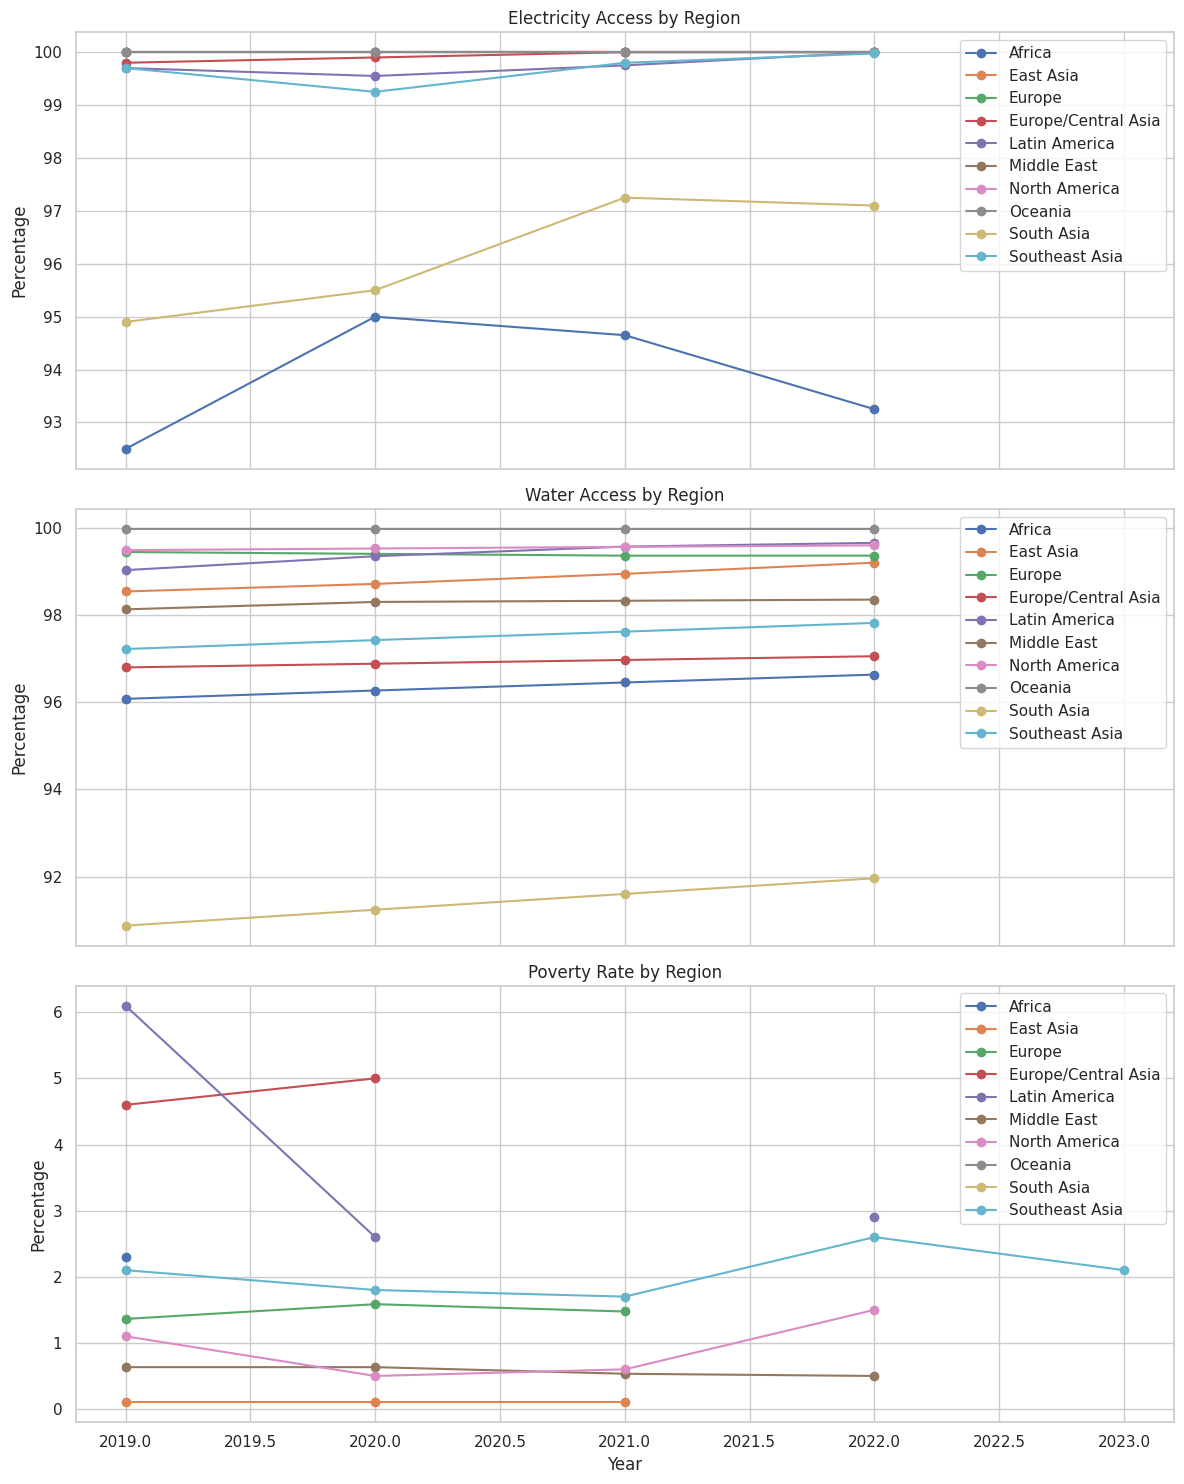

In [ ]:
regional_trends = merged_df.groupby(['region', 'year'])[
    ['ElectricityAccess_PercentofPopulation',
     'Water_BasicDrinkingServices_PercentofPop',
     'Multidim_PovertyHeadcountRatio_WorldBank']
].mean().reset_index()

fig, axs = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

indicators = [
    ('ElectricityAccess_PercentofPopulation', 'Electricity Access'),
    ('Water_BasicDrinkingServices_PercentofPop', 'Water Access'),
    ('Multidim_PovertyHeadcountRatio_WorldBank', 'Poverty Rate')
]

for i, (col, label) in enumerate(indicators):
    ax = axs[i]
    for region in regional_trends['region'].unique():
        region_data = regional_trends[regional_trends['region'] == region]
        ax.plot(region_data['year'], region_data[col], marker='o', label=region)
    ax.set_title(f"{label} by Region")
    ax.set_ylabel("Percentage")
    ax.grid(True)
    if i == 2:
        ax.set_xlabel("Year")
    ax.legend(loc='best')

plt.tight_layout()
plt.show()

Electricity Access
Almost all regions are close to 100% — very little room for improvement left.

Africa and South Asia still trail slightly, showing gradual progress.

Oceania saw a noticeable jump around 2020–2021 — likely due to infrastructure investments.

Water Access
Similarly high across most regions.

Africa and South Asia again lag behind, though improving steadily.

Differences are small, suggesting that most regions have improved basic water access.

Poverty Rate
Latin America shows a large drop from 2019–2021, then a bounce in 2022.

Africa and South Asia have the highest consistent poverty rates.

Regions like North America, Europe, and East Asia stay below 1%, showing structural stability.



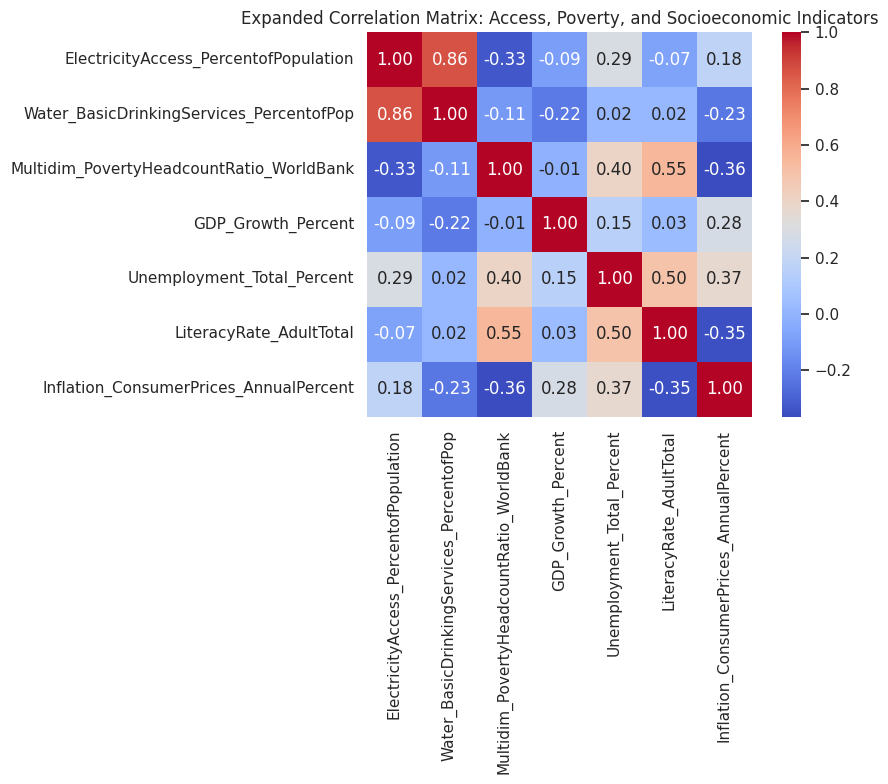

In [ ]:
selected_columns = [
    'ElectricityAccess_PercentofPopulation',
    'Water_BasicDrinkingServices_PercentofPop',
    'Multidim_PovertyHeadcountRatio_WorldBank',
    'GDP_Growth_Percent',
    'Unemployment_Total_Percent',
    'LiteracyRate_AdultTotal',
    'Inflation_ConsumerPrices_AnnualPercent'
]

corr_data = merged_df[selected_columns].dropna()

expanded_corr_matrix = corr_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(expanded_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Expanded Correlation Matrix: Access, Poverty, and Socioeconomic Indicators")
plt.tight_layout()
plt.show()


Although access to electricity and clean water plays an important role, poverty reduction is more strongly tied to improvements in education and reductions in unemployment. Infrastructure provides a foundation, but long-term progress depends on broader socioeconomic development

# **How do literacy rates, unemployment rates by education level, and GDP growth predict poverty levels?**

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

features = [
    'LiteracyRate_AdultTotal',
    'Unemployment_BasicEducation_Percent',
    'Unemployment_IntermediateEducation_Percent',
    'Unemployment_AdvancedEducation_Percent',
    'GDP_Growth_Percent'
]
target = 'Multidim_PovertyHeadcountRatio_WorldBank'

regression_data = merged_df[features + [target]].dropna()

X = regression_data[features]
y = regression_data[target]

model = LinearRegression()
model.fit(X, y)

coefficients = pd.Series(model.coef_, index=features)
intercept = model.intercept_
r_squared = model.score(X, y)

(coefficients, intercept, r_squared)


(LiteracyRate_AdultTotal                      -0.172255
 Unemployment_BasicEducation_Percent          -0.058619
 Unemployment_IntermediateEducation_Percent    0.624615
 Unemployment_AdvancedEducation_Percent       -0.593294
 GDP_Growth_Percent                           -0.024342
 dtype: float64,
 np.float64(17.35444548557205),
 0.7044386371010273)

In [ ]:

regression_df = merged_df[features + [target]].copy()

#Drop rows with any missing values
regression_df = regression_df.dropna()


regression_df = regression_df.drop_duplicates()

#Remove extreme outliers using IQR method (interquartile range)
Q1 = regression_df.quantile(0.25)
Q3 = regression_df.quantile(0.75)
IQR = Q3 - Q1

# Keep only rows within 1.5 * IQR
regression_df = regression_df[~((regression_df < (Q1 - 1.5 * IQR)) | (regression_df > (Q3 + 1.5 * IQR))).any(axis=1)]


print(regression_df.describe())
print("Remaining rows:", len(regression_df))
""

       LiteracyRate_AdultTotal  Unemployment_BasicEducation_Percent  \
count                38.000000                            38.000000   
mean                 95.843332                             8.283395   
std                   2.290079                             6.570985   
min                  91.269150                             0.548000   
25%                  94.690002                             2.868000   
50%                  96.000000                             6.728000   
75%                  97.000000                            13.101000   
max                  99.000000                            21.010000   

       Unemployment_IntermediateEducation_Percent  \
count                                   38.000000   
mean                                     8.491158   
std                                      5.266307   
min                                      0.998000   
25%                                      5.270000   
50%                                      8

''

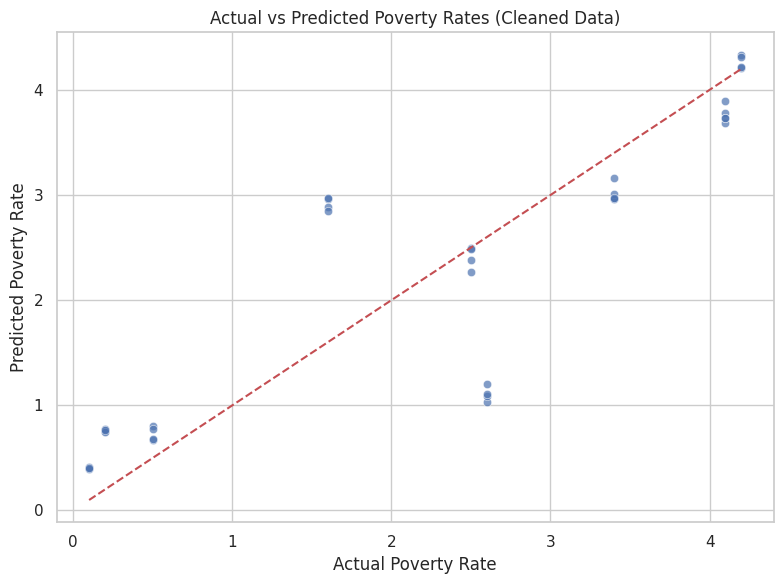

Regression Coefficients:
 LiteracyRate_AdultTotal                       0.060667
Unemployment_BasicEducation_Percent          -0.144823
Unemployment_IntermediateEducation_Percent    0.787953
Unemployment_AdvancedEducation_Percent       -0.836776
GDP_Growth_Percent                           -0.134012
dtype: float64

Intercept: -4.262480319838716

R-squared: 0.7835647752383789


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns


merged_df = pd.merge(df, environmental_df, on=['country_code', 'year'])


features = [
    'LiteracyRate_AdultTotal',
    'Unemployment_BasicEducation_Percent',
    'Unemployment_IntermediateEducation_Percent',
    'Unemployment_AdvancedEducation_Percent',
    'GDP_Growth_Percent'
]
target = 'Multidim_PovertyHeadcountRatio_WorldBank'

#Drop missing values
regression_data = merged_df[features + [target]].dropna()

#Drop duplicates
regression_data = regression_data.drop_duplicates()

#Remove outliers using IQR method
Q1 = regression_data.quantile(0.25)
Q3 = regression_data.quantile(0.75)
IQR = Q3 - Q1
regression_data = regression_data[~((regression_data < (Q1 - 1.5 * IQR)) | (regression_data > (Q3 + 1.5 * IQR))).any(axis=1)]


X = regression_data[features]
y = regression_data[target]


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Poverty Rate")
plt.ylabel("Predicted Poverty Rate")
plt.title("Actual vs Predicted Poverty Rates (Cleaned Data)")
plt.grid(True)
plt.tight_layout()
plt.show()


coefficients = pd.Series(model.coef_, index=features)
intercept = model.intercept_
r_squared = model.score(X, y)

print("Regression Coefficients:\n", coefficients)
print("\nIntercept:", intercept)
print("\nR-squared:", r_squared)


In [ ]:
from sklearn.linear_model import LinearRegression

X = regression_df[features]
y = regression_df[target]

model = LinearRegression()
model.fit(X, y)


coefficients = pd.Series(model.coef_, index=features)
intercept = model.intercept_
r_squared = model.score(X, y)

print(coefficients)
print("\nIntercept:", intercept)
print("\nR-squared:", r_squared)


LiteracyRate_AdultTotal                       0.060667
Unemployment_BasicEducation_Percent          -0.144823
Unemployment_IntermediateEducation_Percent    0.787953
Unemployment_AdvancedEducation_Percent       -0.836776
GDP_Growth_Percent                           -0.134012
dtype: float64

Intercept: -4.262480319838716

R-squared: 0.7835647752383789


In [ ]:
styled_table = coefficients.to_frame(name='Coefficient').style.background_gradient(cmap='coolwarm').format(precision=3)
styled_table


,Coefficient
LiteracyRate_AdultTotal,0.061
Unemployment_BasicEducation_Percent,-0.145
Unemployment_IntermediateEducation_Percent,0.788
Unemployment_AdvancedEducation_Percent,-0.837
GDP_Growth_Percent,-0.134


**the regression model explains 78% of the variation in poverty. Unemployment among those with intermediate education was the strongest driver of poverty. In contrast, GDP growth and unemployment among highly educated individuals were linked to lower poverty. Adult literacy showed a weaker, slightly positive relationship, suggesting that education alone may not be enough without job opportunities**

#**Do countries with higher youth literacy rates have significantly lower youth unemployment rates?**

LiteracyRate_YouthTotal            845
Unemployment_YouthTotal_Percent     55
dtype: int64
Duplicates: 124
       LiteracyRate_YouthTotal  Unemployment_YouthTotal_Percent
count                 155.0000                       155.000000
mean                   97.8243                        18.423603
std                     4.8575                         9.922731
min                    73.0000                         4.159000
25%                    98.0000                        10.049000
50%                    99.0000                        16.220000
75%                   100.0000                        27.007000
max                   100.0000                        37.067900


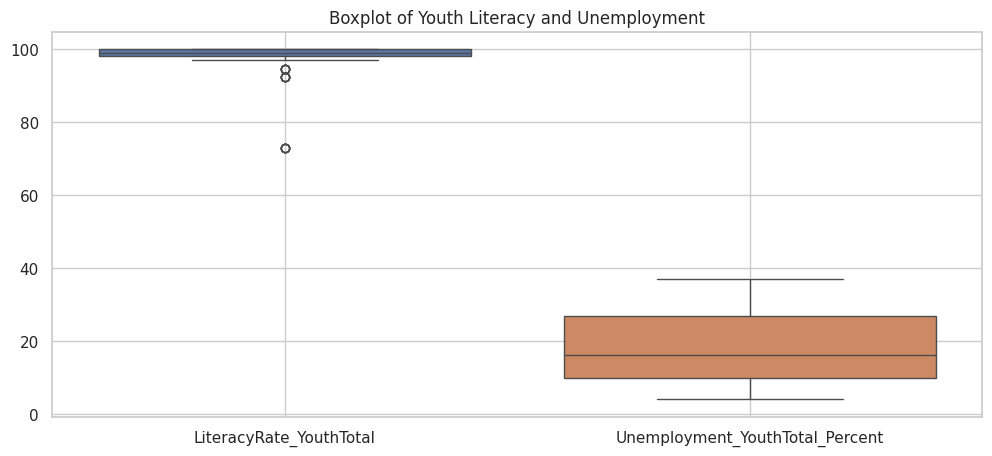

In [ ]:
print(merged_df[['LiteracyRate_YouthTotal', 'Unemployment_YouthTotal_Percent']].isna().sum())

clean_df = merged_df[['LiteracyRate_YouthTotal', 'Unemployment_YouthTotal_Percent']].dropna()

#Check for duplicate rows
print("Duplicates:", clean_df.duplicated().sum())

#Check data ranges (sanity check)
print(clean_df.describe())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.boxplot(data=clean_df)
plt.title("Boxplot of Youth Literacy and Unemployment")
plt.grid(True)
plt.show()


In [ ]:

clean_df = merged_df[['LiteracyRate_YouthTotal', 'Unemployment_YouthTotal_Percent']].dropna()
clean_df = clean_df.drop_duplicates()


High Literacy Mean Unemployment: 20.44886
Low Literacy Mean Unemployment: 16.524925000000003
T-statistic: 2.518551965732153
P-value: 0.012831806861403918


<ipython-input-72-1084c13e2e43>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


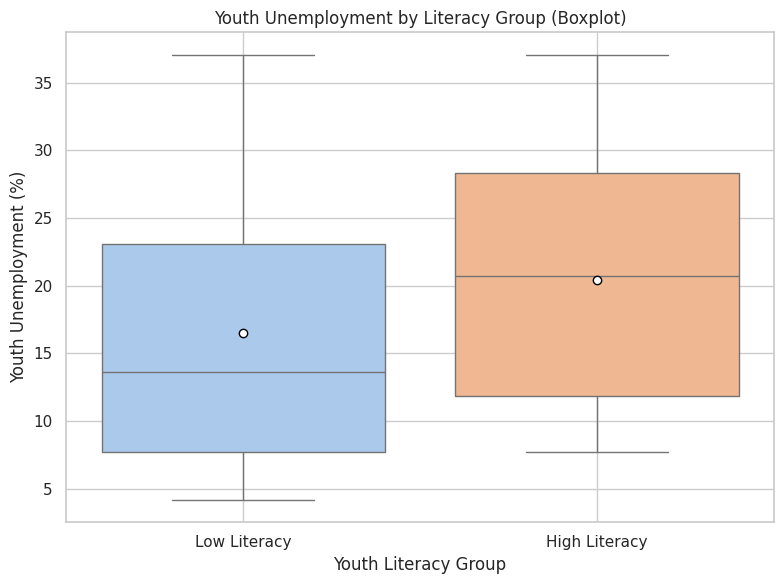

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


hypothesis_df = merged_df[['LiteracyRate_YouthTotal', 'Unemployment_YouthTotal_Percent']].dropna()


median_lit = hypothesis_df['LiteracyRate_YouthTotal'].median()


high_lit_group = hypothesis_df[hypothesis_df['LiteracyRate_YouthTotal'] > median_lit]
low_lit_group = hypothesis_df[hypothesis_df['LiteracyRate_YouthTotal'] <= median_lit]
t_stat, p_value = ttest_ind(
    high_lit_group['Unemployment_YouthTotal_Percent'],
    low_lit_group['Unemployment_YouthTotal_Percent'],
    equal_var=False
)


print("High Literacy Mean Unemployment:", high_lit_group['Unemployment_YouthTotal_Percent'].mean())
print("Low Literacy Mean Unemployment:", low_lit_group['Unemployment_YouthTotal_Percent'].mean())
print("T-statistic:", t_stat)
print("P-value:", p_value)

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=hypothesis_df,
    x=hypothesis_df['LiteracyRate_YouthTotal'] > median_lit,
    y='Unemployment_YouthTotal_Percent',
    palette='pastel',
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black"}
)
plt.xticks([0, 1], ['Low Literacy', 'High Literacy'])
plt.title("Youth Unemployment by Literacy Group (Boxplot)")
plt.ylabel("Youth Unemployment (%)")
plt.xlabel("Youth Literacy Group")
plt.grid(True)
plt.tight_layout()
plt.show()


While we often expect that education leads directly to better employment outcomes, this analysis shows that in some countries, youth literacy is high, but job opportunities are still limited. This suggests that education alone isn't enough — economic and labor market conditions must also support young workers